In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras.models import Sequential

In [3]:
# Charger les données
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# Classes
Class_cifar10 = ['Avion', 'Automobile','Oiseau','Chat','Cerf','Chien','Grenouille','Cheval','Bateau','Camion']

In [5]:
# Formes des ensembles d'entrainement et de test
print(f"Ensemble d'entrainement (Image) : {X_train.shape}")
print(f"Ensemble d'entrainement (Étiquette) : {y_train.shape}")
print(f"Ensemble de test (Image) : {X_test.shape}")
print(f"Ensemble de test (Étiquette) : {y_test.shape}")

Ensemble d'entrainement (Image) : (50000, 32, 32, 3)
Ensemble d'entrainement (Étiquette) : (50000, 1)
Ensemble de test (Image) : (10000, 32, 32, 3)
Ensemble de test (Étiquette) : (10000, 1)


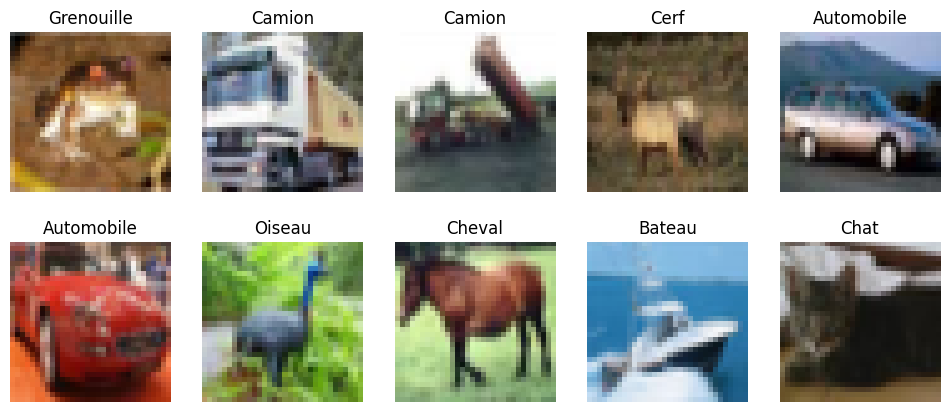

In [6]:
# Visualisation de quelques images

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X_train[i])
    plt.title(Class_cifar10[y_train[i][0]])
    plt.axis('off')
plt.show()

In [7]:
# Distribution
Distribution_Class = [0]*10
for label in y_train:
    Distribution_Class[label[0]] += 1

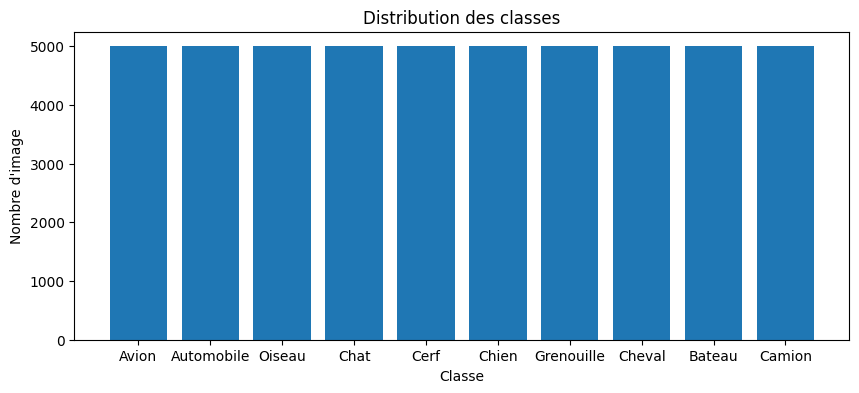

In [8]:
plt.figure(figsize=(10,4))
plt.bar(Class_cifar10, Distribution_Class)
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'image')
plt.show()

In [9]:
# Prétraitement des données

    # Normalisation
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [10]:
    # One-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
    # Dimension après prétraitement
print(f"Ensemble d'entrainement (Image) : {X_train.shape}")
print(f"Ensemble d'entrainement (Étiquette) : {y_train.shape}")
print(f"Ensemble de test (Image) : {X_test.shape}")
print(f"Ensemble de test (Étiquette) : {y_test.shape}")

Ensemble d'entrainement (Image) : (50000, 32, 32, 3)
Ensemble d'entrainement (Étiquette) : (50000, 10)
Ensemble de test (Image) : (10000, 32, 32, 3)
Ensemble de test (Étiquette) : (10000, 10)


In [12]:
# Construction du modèle

    # Modèle MLP
mpl_model = Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
mpl_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
mpl_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
historique = mpl_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = mpl_model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2659 - loss: 2.0392 - val_accuracy: 0.3569 - val_loss: 1.8170
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3605 - loss: 1.8019 - val_accuracy: 0.3539 - val_loss: 1.8401
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3882 - loss: 1.7394 - val_accuracy: 0.3829 - val_loss: 1.7479
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4061 - loss: 1.6816 - val_accuracy: 0.3984 - val_loss: 1.7004
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4109 - loss: 1.6620 - val_accuracy: 0.3935 - val_loss: 1.7141
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4216 - loss: 1.6352 - val_accuracy: 0.4047 - val_loss: 1.7095
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4313 - loss: 1.6042 - val_accuracy: 0.4239 - val_loss: 1.6427
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4419 - loss: 1.5909 - val_accuracy: 0.

In [16]:
print(test_accuracy)
print(test_loss)

0.44350001215934753
1.5642592906951904


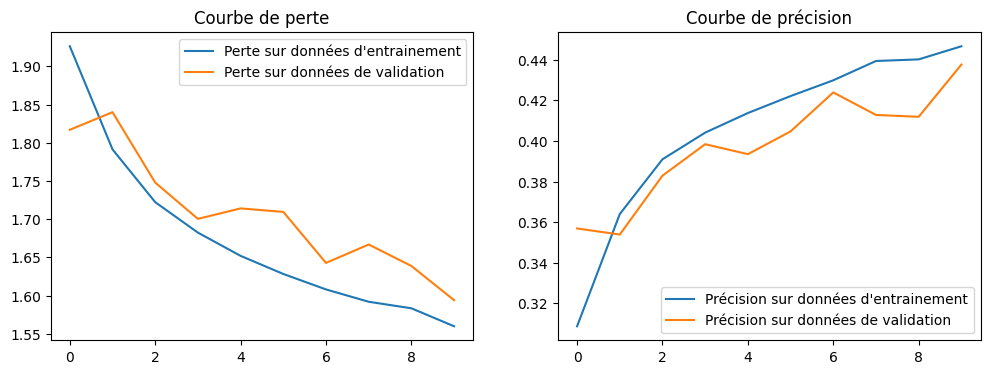

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(historique.history['loss'], label= "Perte sur données d'entrainement")
plt.plot(historique.history['val_loss'], label= "Perte sur données de validation")
plt.legend()
plt.title("Courbe de perte")

plt.subplot(1,2,2)
plt.plot(historique.history['accuracy'], label="Précision sur données d'entrainement")
plt.plot(historique.history['val_accuracy'], label= "Précision sur données de validation")
plt.legend()
plt.title("Courbe de précision")

plt.show()

In [30]:
print(f"Précision sur les données de test : {test_accuracy*100:.2f}%")

Précision sur les données de test : 44.35%


In [21]:
CLASSES = np.array(Class_cifar10).reshape(10, 1)
print("Classes : ", CLASSES)

Classes :  [['Avion']
 ['Automobile']
 ['Oiseau']
 ['Chat']
 ['Cerf']
 ['Chien']
 ['Grenouille']
 ['Cheval']
 ['Bateau']
 ['Camion']]


In [22]:
predictions = mpl_model.predict(X_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=1)]
vrais_labels = CLASSES[np.argmax(y_test, axis=1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
Nbre_img = 5
indices = np.random.choice(range(len(X_test)), Nbre_img, replace=False)

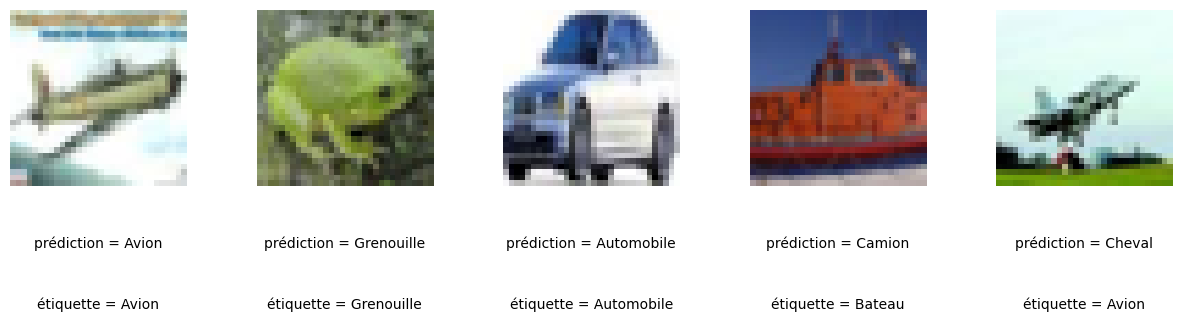

In [29]:
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    image = X_test[idx]
    ax = fig.add_subplot(1, Nbre_img, i + 1)
    ax.axis("off")
    ax.text(0.5, -0.35, f"prédiction = {predictions_simples[idx][0]}", fontsize = 10 , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, f"étiquette = {vrais_labels[idx][0]}", fontsize = 10 , ha='center', transform=ax.transAxes)
    ax.imshow(image)

plt.show()
